# Lecture 2 : Unconstrained optimization

*May, 2022 - François HU*

*Master of Science - EPITA*

*This lecture is available here: https://curiousml.github.io/*

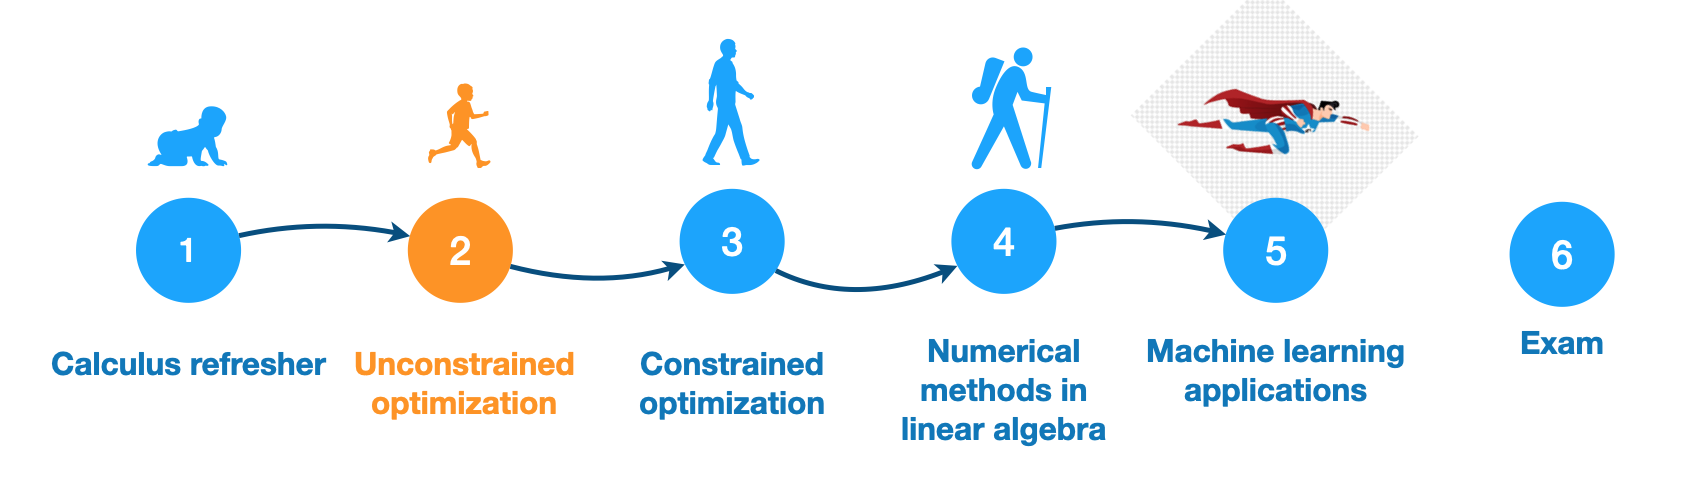

# Last lecture

- **Generalities on optimization problems**
    - Notion of critical point
    - Necessary and sufficient condition of optimality


- **Optimization in dimension 1**
    - Golden section search
    - Newton method

# Table of contents

**Unconstrained optimization in dimension $n\geq2$**

- [Newton method](#1)


- [(optional) alternative Hessian-free optimization](#2)
    - [Quasi-Newton method](#3)
    - [BFGS method](#4)


- [Alternative Hessian-free optimization without Hessian approximation](#5)
    - [Gradient descent method](#6)


- [Alternative Derivative-free optimization](#7)
    - [Finite-difference method](#9)
    - [Nelder-Meade method](#8)


- [Optimization with sampling](#7)
    - [Cross-Entropy](#8)


- [Exercice](#E)


Let $f:\mathbb{R}^n \to\mathbb{R}$ be a real valued function of $n$ variables

## Newton method

- We know that a minimum $x^*$ verifies $\nabla f(x^*) = 0$. We can therefore try to to solve the equation $\nabla f(x) = 0$ by Newton method.

- We can also approximate $f$ by
$$
f(x+h) \approx f(x) + \nabla f(x)h + \dfrac{1}{2}h^TH_f(x)h
$$
and minimise the quadratic approximation as a function of $h$

- In both cases, we obtain the iteration,
$$
x_{k+1} = x_k - H_f^{-1}(x_k)\nabla f(x_k)
$$

- We do not explicitly calculate the inverse of the Hessian. Instead, we solve the linear system
$$
x_{k+1} = x_k + s_k
$$

- The convergence of Newton's method is quadratic provided you start the iteration close enough to the result.


- <b><font color="red">Rmk: The calculation of the Hessian is expensive!</font></b>. see alternative Hessian-free methods [Quasi-Newton method](https://en.wikipedia.org/wiki/Quasi-Newton_method) and [BFGS method](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm).

## Newton method : Example/Exercice


- We want to minimize the function:
$$
f(x)=0.5x_1^2+2.5x_2^2
$$


- Compute the **gradient** and the **Hessian**



- We start with $x_0=\begin{bmatrix}5\\1\end{bmatrix}$, what is the value of $\nabla f(x_0)$ ?



- The linear system to be solved becomes:
$$
H_f(x)s_0 = -\nabla f(x_0)
$$
see Algorithm Workshop 4 for solving linear systems


- Compute the value $x_1$.

## Alternative Hessian-free methods

- [Quasi-Newton method](https://en.wikipedia.org/wiki/Quasi-Newton_method)


- [BFGS method](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)

## Alternative Hessian-free optimization without Hessian approximation


- [Gradient descent method](https://en.wikipedia.org/wiki/Gradient_descent#Choosing_the_step_size_and_descent_direction)


### Gradient descent method

- At each point x where the gradient is non-zero, $-\nabla f(x)$ corresponds locally to the direction of descent with the greatest slope: $f$ decreases more rapidly in this direction than in another.


- **Gradient method:** we start from an initial point $x_0$ and calculate the successive iterates by
$$
x_{k+1} = x_k - \alpha_k \nabla f(x_k)
$$
where $\alpha_k$ is a parameter that determines the distance to travel in the direction $\nabla f(x_k)$


- this parameter $\alpha_k$ can be calibrated as a solution the minimisation problem:
$$
\min\limits_{\alpha_k\geq 0} f(x_k - \alpha_k \nabla f(x_k))
$$
that can be solved with an optimization algorithm in dimension
1 (see previous lesson)


- as long as the gradient is non-zero, we decrease $f(x)$. Convergence is linear.

## Gradient descent method : Example/Exercice


- We want to minimize the function:
$$
f(x)=0.5x_1^2+2.5x_2^2
$$


- The **gradient** is given by $\nabla f(x)=\begin{bmatrix}x_1\\5x_2\end{bmatrix}$



- We start with $x_0=\begin{bmatrix}5\\1\end{bmatrix}$, we have $\nabla f(x_0) = \begin{bmatrix}5\\5\end{bmatrix}$



- Compute the values $\alpha_0$ and $x_1$.

## Alternative Derivative-free optimization


- [Finite-difference method](https://en.wikipedia.org/wiki/Finite_difference_method)



- [Nelder-Meade method](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method)


### Finite-difference method

**Principle**

- We want to approximate the gradient by finite difference:
$$
(\nabla f(x))_i \approx \dfrac{f(x+t e_i)-f(x)}{t}
$$
with small $t$ and $e_i$ the i-th standard basis vector.



- Little precision on the gradient

## Optimization with sampling

- Cross-Entropy method

### Cross-Entropy method

- The Cross-Entropy method can be used to optimize an objective function $S$ with sampling approach. The idea is to sample randomly (following a *probability disribution*) in a search space that we hope to reduce iteratively.


- Let us denote $g^* = f(\cdot, \theta^*) \in \{f(\cdot, \theta), \theta\in\Theta\}$ the optimal sample distribution that samples the optimizer.


- Iteratively,
    1. we sample $Y_1, \dots, Y_n \sim g_{\theta_t} = f(\cdot, \theta)$
    2. we estimate $\theta_{t+1}$ (e.g. MLE) on the "best" $T\%$ $Y_i$ (usually $10\%$)


- If $\theta_{t+1}$ converges (e.g. $|\theta_{t+1}-\theta_{t}|<\varepsilon$) then we stop the process

### Cross-Entropy method: Example

**Optimization, find:** $x^*\in\arg\max_{x} S(x)$

for t = 0:

- we sample $Y_1, \dots, Y_n \sim \mathcal{N}(\mu_t, \sigma_t^2)$

- we choose the best $10\%$ $Y_i$ that maximize $S$

- we estimate (by MLE) $\mu_{t+1}$ and $\sigma_{t+1}^2$
    - $\mu_{t+1} = $ empirical mean of the best $Y_i$
    - $\sigma_{t+1}^2 = $ empirical variance of the best $Y_i$

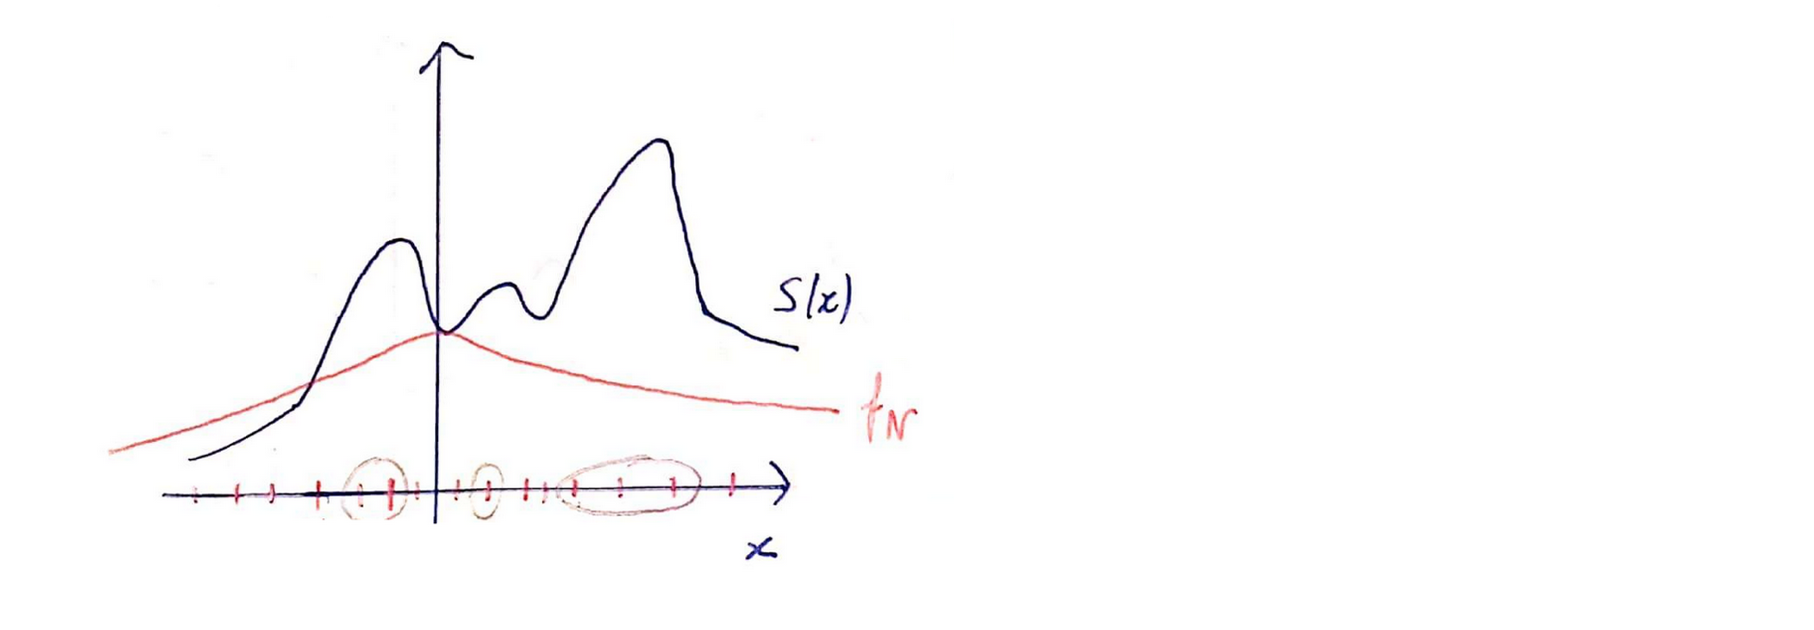

### Cross-Entropy method: Example

for t = 1:

- we sample $Y_1, \dots, Y_n \sim \mathcal{N}(\mu_t, \sigma_t^2)$

- we choose the best $10\%$ $Y_i$ that maximize $S$

- we estimate (by MLE) $\mu_{t+1}$ and $\sigma_{t+1}^2$
    - $\mu_{t+1} = $ empirical mean of the best $Y_i$
    - $\sigma_{t+1}^2 = $ empirical variance of the best $Y_i$

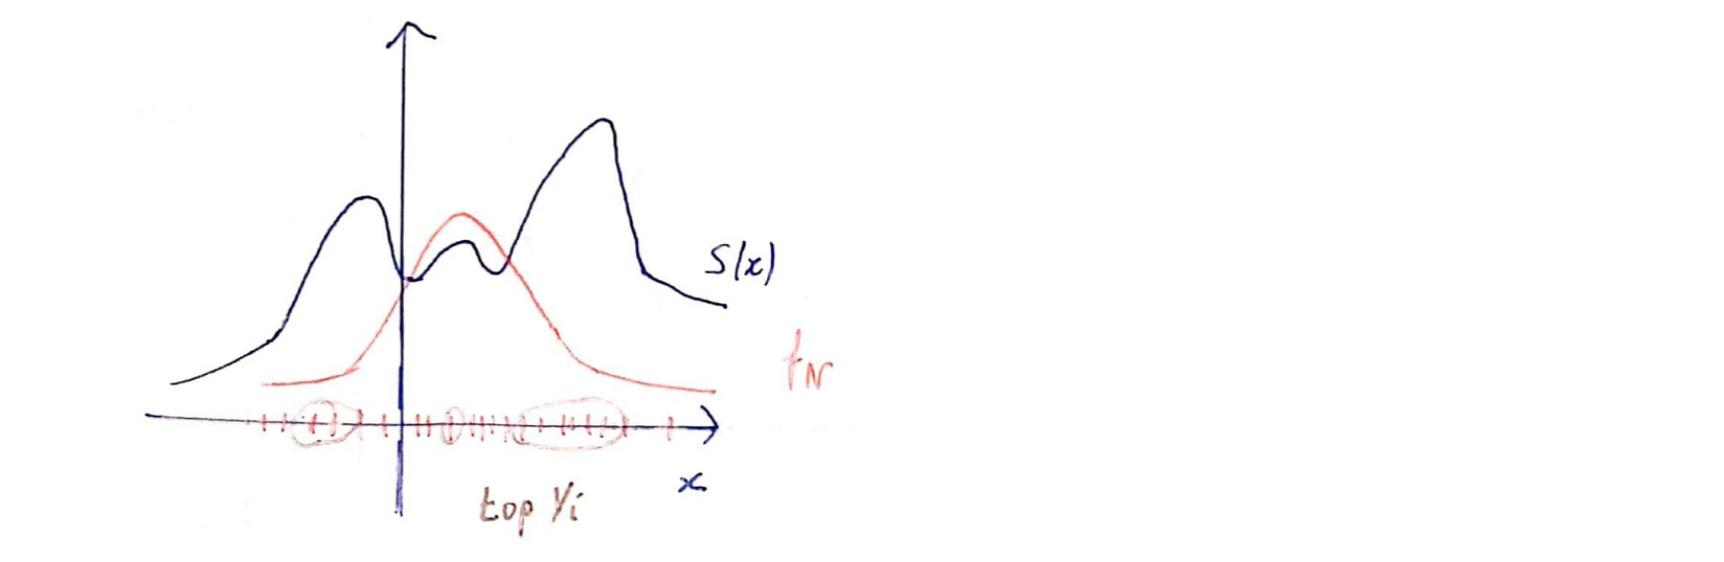

### Cross-Entropy method: Example

for t = 8:

- we sample $Y_1, \dots, Y_n \sim \mathcal{N}(\mu_t, \sigma_t^2)$

- we choose the best $10\%$ $Y_i$ that maximize $S$

- we estimate (by MLE) $\mu_{t+1}$ and $\sigma_{t+1}^2$
    - $\mu_{t+1} = $ empirical mean of the best $Y_i$
    - $\sigma_{t+1}^2 = $ empirical variance of the best $Y_i$

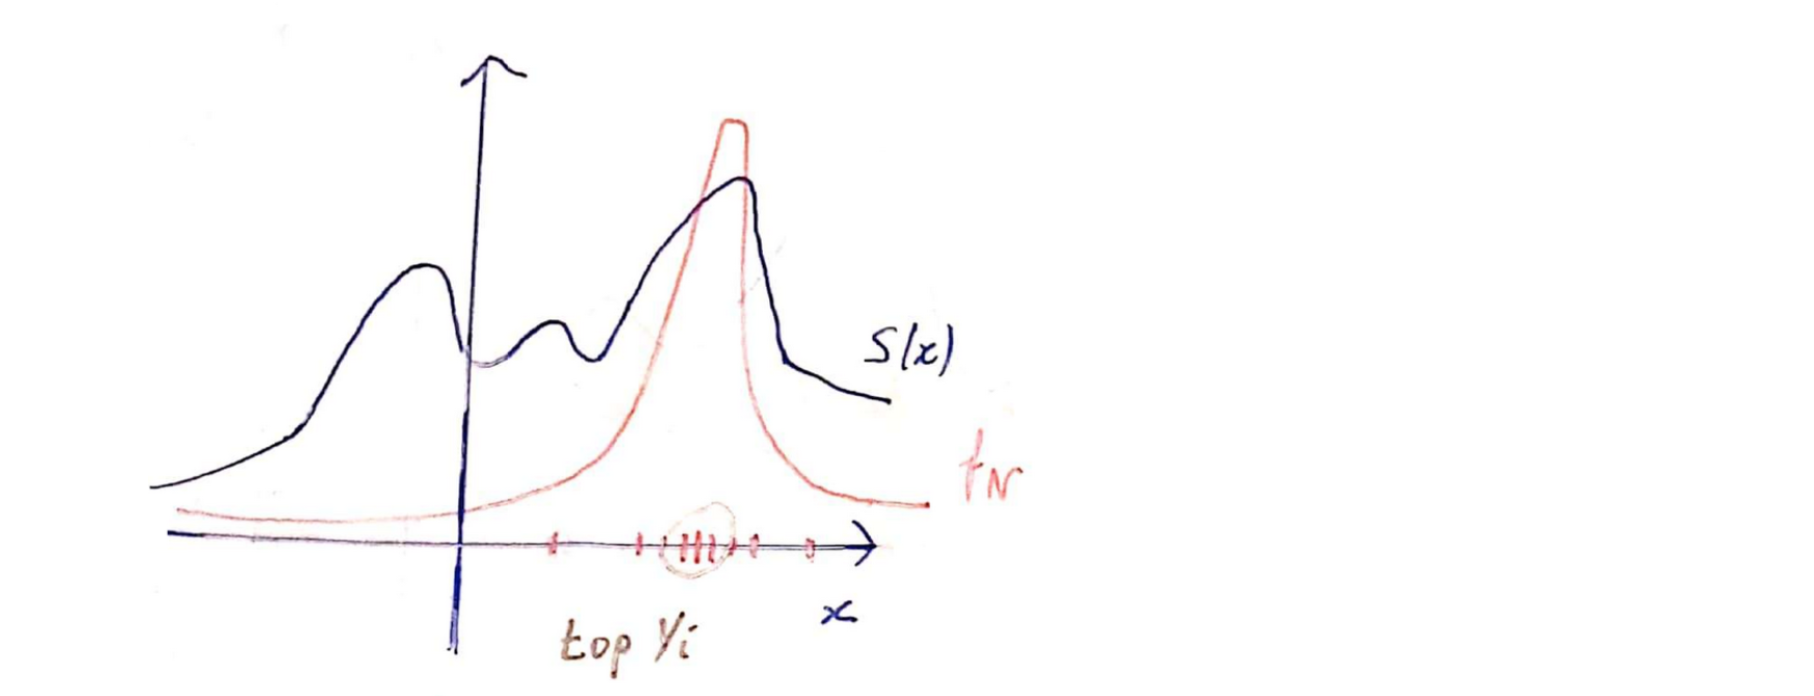

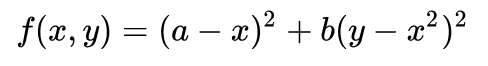

## Exercice

Let $f(x, y) = (a-x)^2 + b(y-x^2)^2$ be the function of [Rosenbrock](https://en.wikipedia.org/wiki/Rosenbrock_function). The Rosenbrock function (by Howard H. Rosenbrock in 1960) is used as a performance test problem for optimization algorithms. It has a global minimum at $(a ,a^2)$.

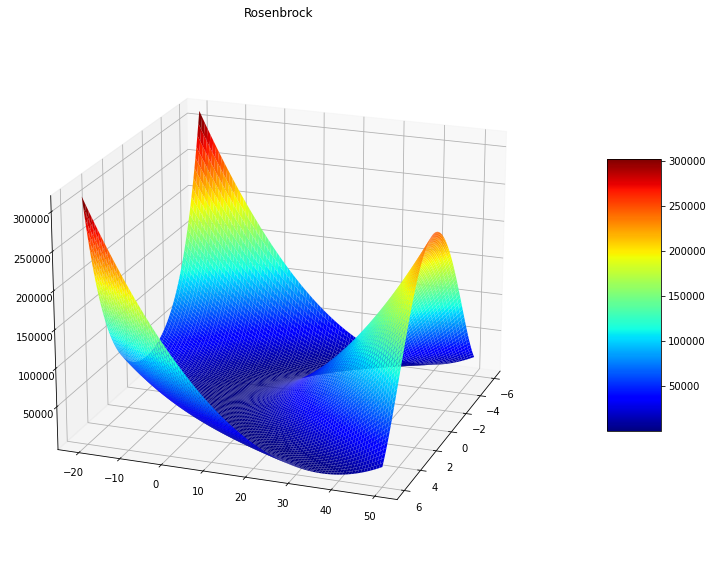

**Question 1:** 

Define the rosenbrock function `rosenbrock(X, a=1, b=100)` and do a 3D plot of the function in the region $[-6, 6]\times[-20, 50]$. In our case $X=(x, y)$

**Question 2:** 

Define:
- a function `rosenbrock_gradient(X, a=1, b=100)` that returns the gradient of the rosenbrock function (in an array)
- a function `rosenbrock_hessian(X, a=1, b=100)` that returns the Hessian of the rosenbrock function (in an array)

**Question 3: Newton method** 

Define the newton optimizer `newton(gradient_function, hessian_function, x0, eps=1e-10, max_iter=1000)` that returns the minimum of a function given the gradient and the hessian. The function should stop if `max_iter` iterations are reached or if the norm of the gradient is smaller than `eps`.

**Question 4: Gradient descent method** 

Define the gradient descent optimizer `gradient_descent(gradient_function, alpha=0.01, eps=1e-10, max_iter=1000)` that returns the minimum of a function given the gradient. The function should stop if `max_iter` iterations are reached or if the norm of the gradient is smaller than `eps`. `alpha` corresponds to the step of the method.

**Question 5: Gradient descent method with optimal step** 

Define the gradient descent optimizer `gradient_descent_optimal(function, gradient_function, eps=1e-10, max_iter=1000)` that returns the minimum of a function given the gradient. The function should stop if `max_iter` iterations are reached or if the norm of the gradient is smaller than `eps`. for each iteration `alpha` should be calibrated thanks to an 1D optimizer (e.g. **golden section search** of the first lecture).

**Question 6.** 

- Let us propose an algorithm of type Cross-Entropy `cross_entreopy(function, n_sample = 1000, eps = 1e-10, max_iter = 1000)` to obtain the minimum of any function $S : \mathbb{R}^d \to \mathbb{R}$. Let's apply it to the Rosenbrock function.


Let $S(x) = \sum\limits_{i=1}^d 100 (x_{i+1}-x_i)^2 + (x_i - 1)^2$ be the (variant) function of [Rosenbrock](https://en.wikipedia.org/wiki/Rosenbrock_function). This function admits as global minimum the point $x^* = (1, \dots, 1)$.


- For different values of $d$, note the behaviour of this optimizer.